# 20기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/MJHwang/Downloads/blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [201]:
df.shape

(4998, 12)

In [202]:
df.isna().sum() # 결측치 존재

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [203]:
df.drop(['Product_Category_3'], axis=1, inplace=True) # 결측치의 개수가 너무 많아 제거

In [204]:
df['Product_ID'].nunique()

1797

In [205]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,23913.000000


In [206]:
for col in df.columns:
    print(df[col].value_counts())
    print('*' * 50)

1002063    12
1005795    12
1001980    11
1004344    11
1006036    10
           ..
1004980     1
1004385     1
1004138     1
1002648     1
1000837     1
Name: User_ID, Length: 2656, dtype: int64
**************************************************
P00265242    21
P00220442    16
P00114942    15
P00010742    15
P00148642    15
             ..
P00072342     1
P00037842     1
P00207042     1
P00129742     1
P00358242     1
Name: Product_ID, Length: 1797, dtype: int64
**************************************************
M    3765
F    1233
Name: Gender, dtype: int64
**************************************************
26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64
**************************************************
4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18


In [207]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

C:\Users\MJHwang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

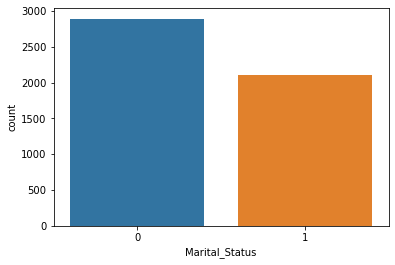

In [208]:
sns.countplot(df['Marital_Status'])

C:\Users\MJHwang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

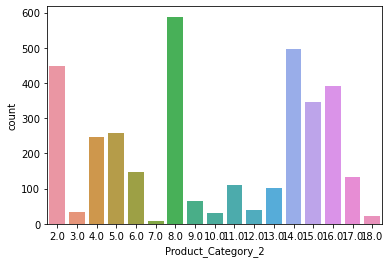

In [209]:
sns.countplot(df['Product_Category_2'])

C:\Users\MJHwang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

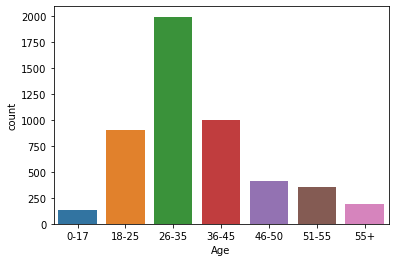

In [210]:
sns.countplot(df['Age'])

<AxesSubplot:>

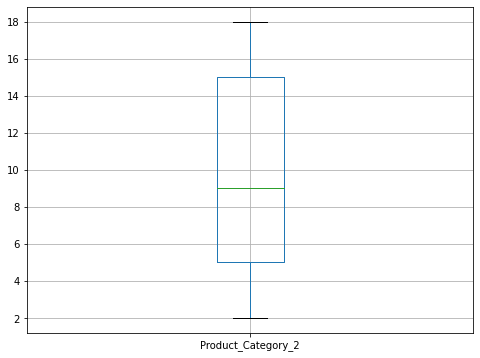

In [211]:
df[['Product_Category_2']].boxplot(figsize=(8, 6))

Product_Category_2의 평균 = 9.77373, 최빈값: 8

In [212]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['Product_Category_2']] = imputer.fit_transform(df[['Product_Category_2']])
# 최빈값으로 결측치 대체

C:\Users\MJHwang\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [213]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [214]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True) 
# 인코딩을 진행해 분석에 사용하기보단 제거하는 게 더 나을 거라 판단

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      4998 non-null   object 
 1   Age                         4998 non-null   object 
 2   Occupation                  4998 non-null   int64  
 3   City_Category               4998 non-null   object 
 4   Stay_In_Current_City_Years  4998 non-null   object 
 5   Marital_Status              4998 non-null   int64  
 6   Product_Category_1          4998 non-null   int64  
 7   Product_Category_2          4998 non-null   float64
 8   Purchase                    4998 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 390.5+ KB


In [216]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,3,0,5,17.0,2010
1,F,0-17,10,A,1,0,7,8.0,4483
2,F,0-17,10,A,1,0,1,4.0,7696
3,F,0-17,10,A,3,0,2,4.0,16429
4,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...
4993,M,55+,7,C,1,1,1,16.0,11701
4994,M,55+,1,C,1,1,8,8.0,2045
4995,M,55+,13,C,3,1,1,6.0,4505
4996,M,55+,0,C,2,1,12,8.0,1413


In [217]:
df.select_dtypes(include="object")

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,0-17,A,3
1,F,0-17,A,1
2,F,0-17,A,1
3,F,0-17,A,3
4,F,0-17,A,3
...,...,...,...,...
4993,M,55+,C,1
4994,M,55+,C,1
4995,M,55+,C,3
4996,M,55+,C,2


In [218]:
df=pd.get_dummies(df, drop_first=True)

In [219]:
df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,5,17.0,2010,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10,0,7,8.0,4483,0,0,0,0,0,0,0,0,0,1,0,0,0
2,10,0,1,4.0,7696,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10,0,2,4.0,16429,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10,0,3,5.0,5780,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,7,1,1,16.0,11701,1,0,0,0,0,0,1,0,1,1,0,0,0
4994,1,1,8,8.0,2045,1,0,0,0,0,0,1,0,1,1,0,0,0
4995,13,1,1,6.0,4505,1,0,0,0,0,0,1,0,1,0,0,1,0
4996,0,1,12,8.0,1413,1,0,0,0,0,0,1,0,1,0,1,0,0


## 2. KNN 구현 & 파라미터 튜닝

In [220]:
X = df.drop(["Purchase"], axis=1)
y = df["Purchase"] # 타겟 변수 설정

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [223]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 10, weights = "uniform") # 일반적인 knn
regressor.fit(X_train , y_train)

y_pred = regressor.predict(X_test)

In [224]:
y_pred

array([10479.4,  8831.8, 11488.1,  6632. ,  7496.4, 10858.2,  8991.7,
       10808.7,  7300. ,  7796.1,  9506.9, 10446.1, 10161.5,  7482.7,
       10118.5, 10692.7,  7201.5,  9710.2, 10477.6,  7575. , 13159.9,
        9010. , 10659.2,  8949.9,  9498.2,  8887.4,  9539.3,  8970.8,
        4069.2,  6483.8, 10244.2,  5828.2, 11141.6,  9431.3,  6694.2,
        9695. ,  8997. ,  8477.4, 10957.4,  6508.7,  9449.3,  8117.8,
        6652. ,  9106.4,  6105.8, 10000.9,  9812.6, 14938.8, 13205.4,
        8039.5,  9526.2,  6452.3,  7407.3,  6103.4,  9030.1,  9988. ,
       12313.2, 10925. , 15003.5,  6422.5,  9132.6,  9825.7,  6828.5,
       11044.8,  8868. ,  8361.1, 12790.2, 12066.7,  7750.3,  6736.9,
        9884.2, 12899.4,  8325.5,  9612.2,  8236.8,  8995.6,  6330.6,
        5719. ,  8582.6, 11025. ,  8239. ,  6083.7,  8260. ,  9214. ,
        6697.3,  6915.6, 12586.4, 10877.1,  7363.9,  7750.3, 11908.6,
        5983.7,  5989.5, 10249.1,  8464.3,  7180.1, 11314.1,  6681.8,
        8137.4,  736

In [225]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared = False)

4721.226941017558

In [226]:
from sklearn.neighbors import KNeighborsRegressor

# KNeighborsRegressor 생성 및 가중치 설정
regressor = KNeighborsRegressor(n_neighbors=10, weights='distance') # 가중치 knn
regressor.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = regressor.predict(X_test)

In [227]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared = False)

4693.796645419444

## 3. Evaluation

일반적인 knn과 가중치 knn을 적용해본 결과 weights = 'uniform'인 일반적인 knn의 경우 mse가 더 높음을 확인할 수 있었다. 